<a href="https://colab.research.google.com/github/maitreya-v/Synapse_LP/blob/Week-9/Week_9_Deployment_(CV).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deployment**

---



#### Getting started
It's good that you made a model with a decent accuracy and all, but what good is this model if you can not integrate it with other application (new/old).

#### Goal
The goal of this task is to teach you how to deploy your model and not to build a model so we will be providing you one python files, one image file and on video.

> black background.jpg

> camera.py

> movie.mp4

We will be using **FLASK** to deploy our model because:

*   Flask is easy to learn
*   Flask is faster

You can also use Django if you already have a running backend or make another backend for ml models like someone ik did in a hackthon. lazy guy.



## **FLASK**

---

Below is a video tutorial about FLASK. It's really ok if you don't know FLASK in depth but this will teach you just enough. Feel free to mess around, explore and ping your mentors if you are stuck. We will be your step-brother.



```
It is a shame for a coder to die without fully messing up with things
```

> All-in-on link for FLASK


*   Cringe Level (Tutorialspoint): https://www.tutorialspoint.com/flask/index.htm
*   Noobie Level (YouTube): https://www.youtube.com/watch?v=3mwFC4SHY-Y
*   God Level (Documentation): https://flask.palletsprojects.com/en/2.2.x/tutorial/



# Part 1 (CV File)

Below is a drive link from where you can download those 2 files and templates It contains 1 .py, 1 .jpg, 1 .mp4 and templates folder which contains a 2 html files. (because we are obv not going to teach you frontend)

https://drive.google.com/drive/folders/1ToQvACynPxPG2eiJ4vz4ToCdux1ISVs4?usp=share_link

We will be completing this task on your local machine so make sure you have all the dependencies installed.

---



**I feel before you get started with FLASK, you should understand what camera.py is actually doing. I have added comments for your explanation, just read them.**


In [2]:
import cv2
import mediapipe as mp                                                          # we are using mediapipe, its beautiful

mp_drawing = mp.solutions.drawing_utils                                         # we are assigning powers of drawing_utils to mp_drawing
mp_drawing_styles = mp.solutions.drawing_styles                                 # we are assigning powers of drawing_styles to mp_drawing_styles
mp_holistic = mp.solutions.holistic                                             # naming holistic function mp_holistic

class VideoCamera(object):
    def __init__(self):                                                         # this function basically initializes the cam and takes input from first cam input device
        self.video = cv2.VideoCapture(0)
    
    def __del__(self):                                                          # simple release function for input fetched from cam earlier
        self.video.release()
    
    def get_frame(self):
        ret, frame = self.video.read()                                          # this function reads the video and gets frame

        with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:                      # here we use holistic model
        
            blank_bg = cv2.imread("black background.jpg")                       # getting black background for our output
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            results = holistic.process(image)                                   # this is processing functon, very detailed landmarks for hand, body, face and everything. it is stored in results which we will be using next.
            
            # Now we will be drawing landmarks
            # 1. Draw face landmarks
            mp_drawing.draw_landmarks(blank_bg, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                                    mp_drawing.DrawingSpec(color=(120,110,10), thickness=1, circle_radius=1),
                                    mp_drawing.DrawingSpec(color=(120,256,121), thickness=1, circle_radius=1)
                                    )
            
            # 2. Draw Right hand landmarks
            mp_drawing.draw_landmarks(blank_bg, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                    mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                    mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                    )

            # 3. Draw Left Hand landmarks
            mp_drawing.draw_landmarks(blank_bg, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                    mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                    mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                    )

            # 4. Draw Pose Detections
            mp_drawing.draw_landmarks(blank_bg, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                    mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                    mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                    )
            
            # Note that all of this is written on blank_bg, if you replace blank_bg with frame then it will draw landmarks on the frame it reads.
            # You can do that but i choose not to do it, it's the same
        
        # Now comes a crucial part, to sent the image directly to frontend on this device or any other device, we will encode it into jpg format
        # After that we will return bytes of that image

        ret, jpeg = cv2.imencode('.jpg', blank_bg)                              # this gets us the encoded .jpg image
        return jpeg.tobytes()                                                   # here we convert it to bytes and send this crap to main.py

ModuleNotFoundError: ignored

# Part 2 (Flask)

Assuming you all know basics of FLASK now, so getting things started. Make a "main.py" file. We will be coding only this file.

Just to keep us on the same page. Your file structure should look like this.

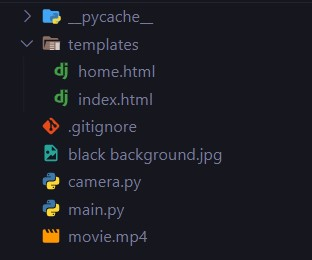

# New Section

In [ ]:
# Install dependencies
from flask import Flask, render_template, Response
from camera import VideoCamera

In [ ]:
app = flask.Flask(__name__)

@app.route('/')
def home():
    return render_template('home.html')                                                                    #render home.html

@app.route('/cool')
def index():
    return render_template('index.html')                                                                      #render index.html

def gen(camera):
    while True:
        frame = camera.get_frame()                                                                #call get_frame() function from camera
        yield (b'--frame\r\n'                                                   #also shows image in bytes format to normal format ;)
                b'Content-Type: image/jpeg\r\n\r\n' + frame + b'\r\n\r\n')

@app.route('/video_frame')
def video_feed():
    return Response(gen(VideoCamera()),
                    mimetype='multipart/x-mixed-replace; boundary=frame')       #mimetype is for the browser, we are basically letting browser what type of file it is


if __name__ == '__main__':
    app.run(host='0.0.0.0', port='5000', debug=True)

# Running model

Now open your command line and type:
```
python main.py
```

It should run on 5000 default port. You should be able to see this.

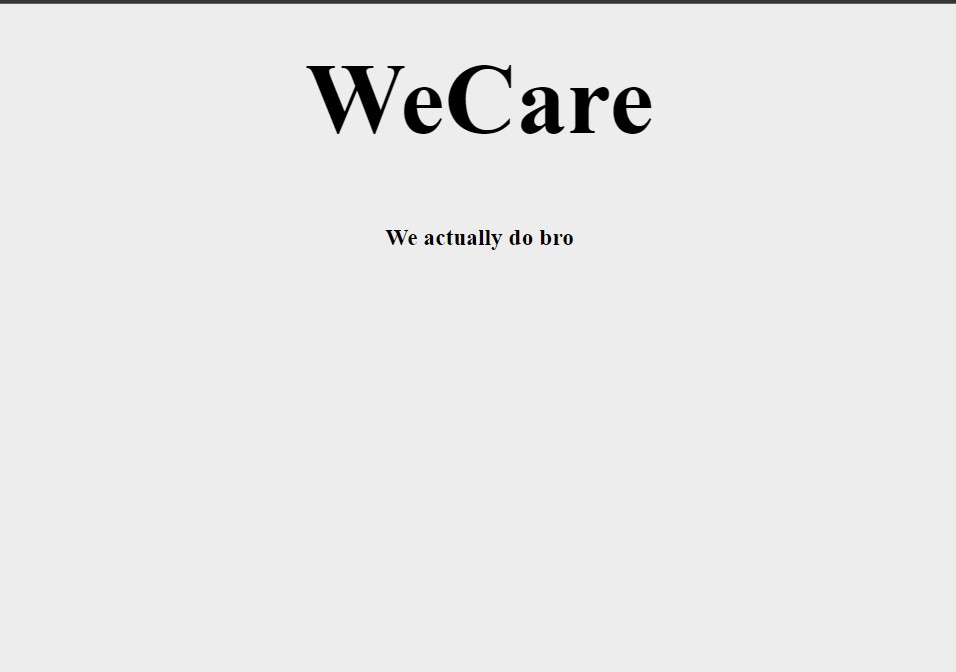

go to '/cool' url and your cam should turn on and you might see something like this.

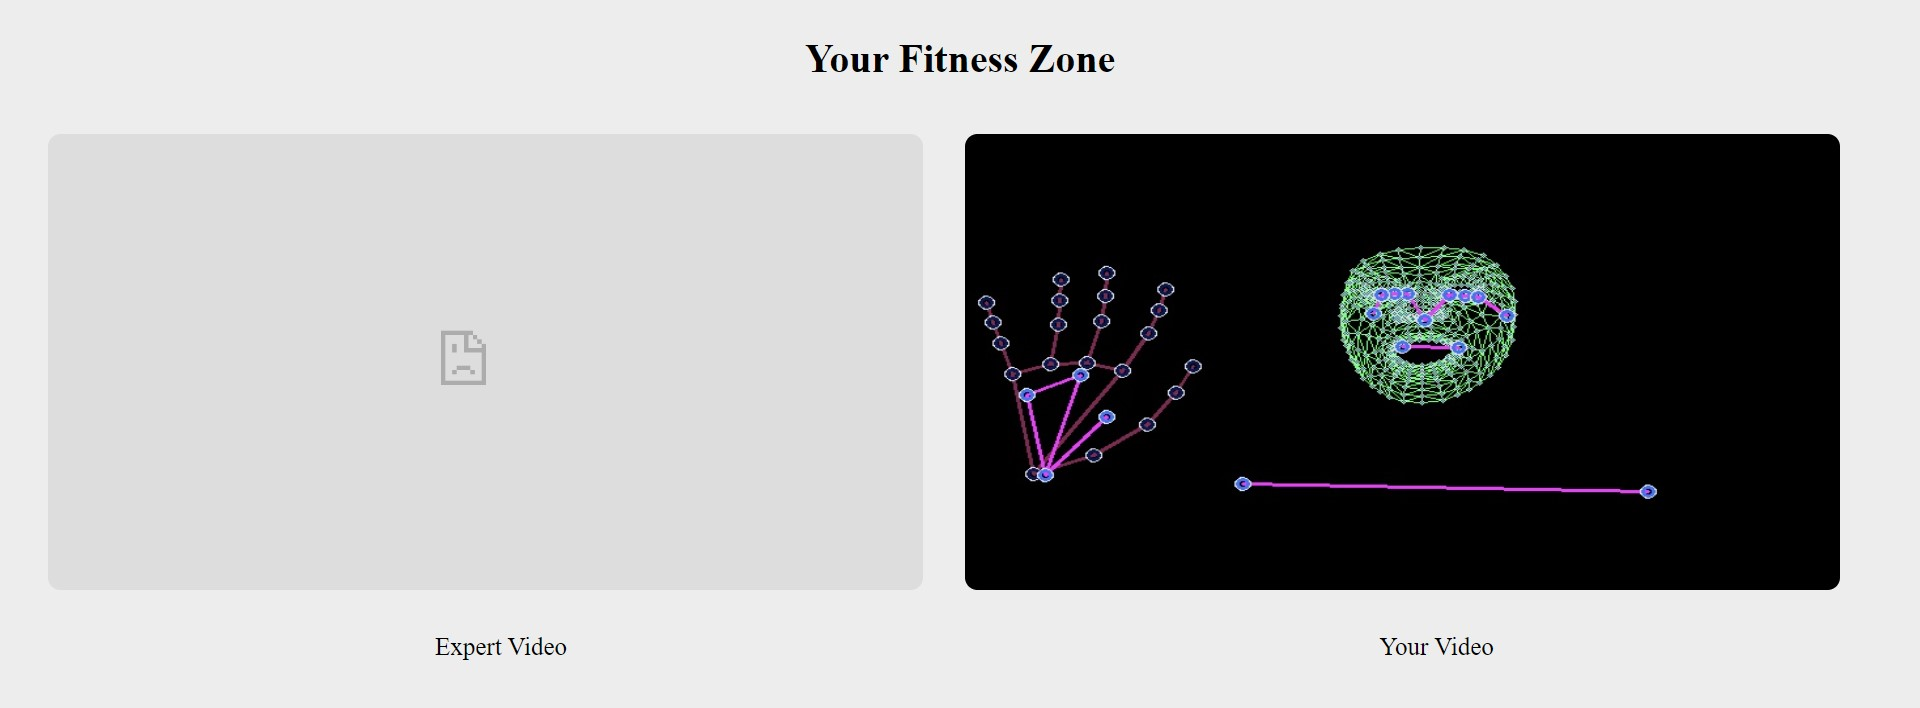

Note: You can get a error from frontend, for the supposed youtube video which was embedded in the frontend using the good old html, but if you change the link of the video, that error should go away. Anyways, you have your model hosted. Congrats.